# 0. Installed Py3Dmol and BioPython

In [ ]:
#Installing py3Dmol and biopython
!pip install py3Dmol biopython

#Importing py3Dmol for safety
import py3Dmol

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.2 MB/s eta 0:00:00


# Installed GROMACS



1.  Changed the "**Runtime**" of the Google Colab and enabled "**T4 GPU**" under "Hardware accelerator" section
2.  **Mounted Google Drive** so that the work will be automatically saved in the Drive (as backup purpose) and **installed GROMACS using following commands**



In [ ]:
#1. Mounted Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#2. created a folder called "gromacs" and then install GROMACS inside that folder
%cd /content/drive/MyDrive/
!mkdir gromacsTools
%cd gromacsTools

#3. installed gromacs

## Downloaded and unzipped the compressed folder of GROMACS 2020.6 version
!wget https://raw.githubusercontent.com/pb3lab/ibm3202/master/software/gromacs.tar.gz
!tar xzf gromacs.tar.gz

## Upgaded cmake
!apt-get update
!pip install cmake --upgrade

## downloaded the libhwloc5 package and installed the package using dpkg:
!wget http://archive.ubuntu.com/ubuntu/pool/universe/h/hwloc/libhwloc5_1.11.9-1_amd64.deb
!dpkg -i libhwloc5_1.11.9-1_amd64.deb

/content/drive/MyDrive
mkdir: cannot create directory ‘gromacsTools’: File exists
/content/drive/MyDrive/gromacsTools
--2023-11-21 05:36:57--  https://raw.githubusercontent.com/pb3lab/ibm3202/master/software/gromacs.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35608971 (34M) [application/octet-stream]
Saving to: ‘gromacs.tar.gz.2’

gromacs.tar.gz.2    100%[===================>]  33.96M  62.2MB/s    in 0.5s    

2023-11-21 05:36:59 (62.2 MB/s) - ‘gromacs.tar.gz.2’ saved [35608971/35608971]

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hi

# 1. Uploaded files generated by Charm-GUI in the Drive


1. Visited the Google Drive and mounted here and created a folder called "lab9" in "MyDrive"

2. Extracted the zip file downloaded from Charm-GUI and find the "gromacs" folder. Uploaded this folder in the "lab9" folder of the Drive

# 2. Energy Mimization of the target protein system

In [ ]:
#Changed directory to this "lab9/gromacs/" folder
%cd /content/drive/MyDrive/FINAL210100/gromacs

/content/drive/MyDrive/FINAL210100/gromacs


In [ ]:
%%bash

init=step3_input
mini_prefix=step4.0_minimization
equi_prefix=step4.1_equilibration
prod_prefix=step5_production
prod_step=step5

# Minimization
gmx grompp -f ${mini_prefix}.mdp -o ${mini_prefix}.tpr -c ${init}.gro -r ${init}.gro -p topol.top -n index.ndx -maxwarn -1
gmx mdrun -v -deffnm ${mini_prefix}

#Using energy to extract the potential energy of the system
echo "Potential" > options
echo " " >> options
gmx energy -f ${mini_prefix}.edr -o em_potential.xvg -xvg none < options

turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 100x100x100, spacing 0.116 0.116 0.116
This run will generate roughly 11 Mb of data

Statistics over 1342 steps [ 0.0000 through 1341.0000 ps ], 1 data sets
All statistics are over 1063 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                -2.35953e+06      32000    69966.6    -212158  (kJ/mol)


                      :-) GROMACS - gmx grompp, 2020.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
     

<ipython-input-14-406c7f9fca4c>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


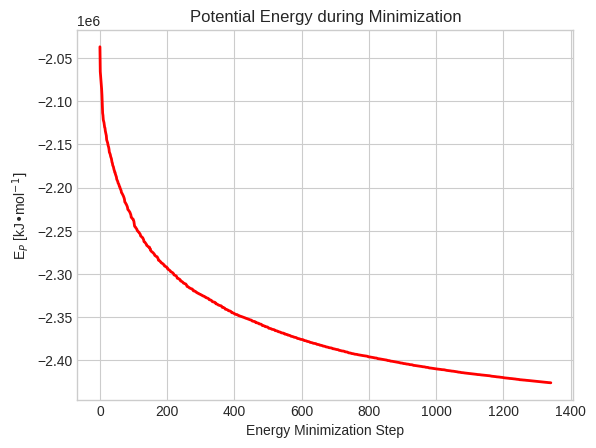

In [ ]:
#Plotting the potential energy of the system
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

#Reading the text file containing this information
data = np.loadtxt('em_potential.xvg')

plt.title('Potential Energy during Minimization')
plt.xlabel('Energy Minimization Step')
plt.ylabel(r'E$_P$ [kJ•mol$^{-1}]$')
plt.plot(data[:,0], data[:,1], linestyle='solid', linewidth='2', color='red')
plt.show()

# 3. Equilibration

In [ ]:
#Checked if I am in the right directory "lab9/gromacs/"
!pwd /content/drive/MyDrive/FINAL210100/gromacs

/content/drive/MyDrive/FINAL210100/gromacs


In [ ]:
%%bash
init=step3_input
mini_prefix=step4.0_minimization
equi_prefix=step4.1_equilibration
prod_prefix=step5_production
prod_step=step5

# Equilibration
gmx grompp -f ${equi_prefix}.mdp -o ${equi_prefix}.tpr -c ${mini_prefix}.gro -r ${init}.gro -p topol.top -n index.ndx
gmx mdrun -v -deffnm ${equi_prefix}

#This is a trick to provide interactive options to gmx
!echo "Temperature" > options
!echo " " >> options

#Using energy to extract the temperature of the system during the NVT equil MD
echo "Temperature" > options
echo " " >> options
gmx energy -f ${equi_prefix}.edr -o nvt_temp.xvg -xvg none < options

turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 303.15 K
Calculated rlist for 1x1 atom pair-list as 1.237 nm, buffer size 0.037 nm
Set rlist, assuming 4x4 atom pair-list, to 1.200 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 100x100x100, spacing 0.116 0.116 0.116
This run will generate roughly 118 Mb of data

Statistics over 125001 steps [ 0.0000 through 125.0000 ps ], 1 data sets
All statistics are over 1251 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Temperature                 303.185      0.049    10.8882   -0.28874  (K)


                      :-) GROMACS - gmx grompp, 2020.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
     

<ipython-input-18-3e3fa1623ed9>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


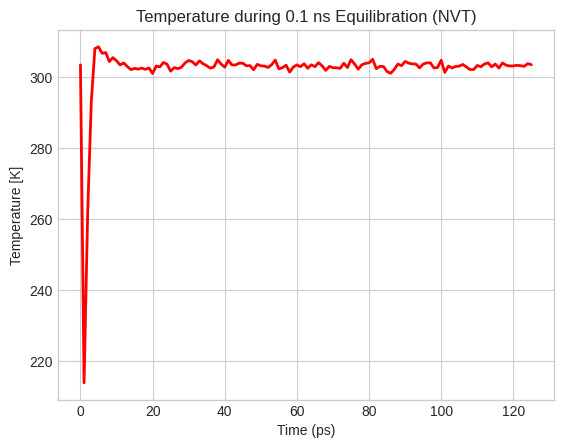

In [ ]:
#Plotting the temperature of the system
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

#Reading the text file containing this information
data = np.loadtxt('nvt_temp.xvg')

plt.title('Temperature during 0.1 ns Equilibration (NVT)')
plt.xlabel('Time (ps)')
plt.ylabel('Temperature [K]')
plt.plot(data[:,0], data[:,1], linestyle='solid', linewidth='2', color='red')
plt.show()

# 4. MDS Production

In [ ]:
#Checked again if i am in the right directory "lab9/gromacs/"
%cd /content/drive/MyDrive/FINAL210100/gromacs

/content/drive/MyDrive/FINAL210100/gromacs


In [ ]:
!pwd

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
pwd: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected


In [ ]:
%%bash
init=step3_input
mini_prefix=step4.0_minimization
equi_prefix=step4.1_equilibration
prod_prefix=step5_production
prod_step=step5


# Production
cnt=1
cntmax=10
pcnt=0

while (( ${cnt} <= ${cntmax} )); do
    istep=${prod_step}_${cnt}
    pstep=${prod_step}_${pcnt}

	if (( ${cnt} == 1 )); then
        pstep=${equi_prefix}
        gmx grompp -f ${prod_prefix}.mdp -o ${istep}.tpr -c ${pstep}.gro -p topol.top -n index.ndx
	else
        gmx grompp -f ${prod_prefix}.mdp -o ${istep}.tpr -c ${pstep}.gro -t ${pstep}.cpt -p topol.top -n index.ndx
	fi
	gmx mdrun -v -deffnm ${istep} -nb gpu
	((cnt++))
 	((pcnt++))
done

Process is terminated.


In [ ]:
%%bash

init=step3_input
mini_prefix=step4.0_minimization
equi_prefix=step4.1_equilibration
prod_prefix=step5_production
prod_step=step5

# Production
gmx grompp -f ${prod_prefix}.mdp -o ${prod_prefix}.tpr -c ${equi_prefix}.gro -p topol.top -n index.ndx
gmx mdrun -v -deffnm ${prod_prefix} -nb gpu

turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 303.15 K
Calculated rlist for 1x1 atom pair-list as 1.295 nm, buffer size 0.095 nm
Set rlist, assuming 4x4 atom pair-list, to 1.222 nm, buffer size 0.022 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 100x100x100, spacing 0.116 0.116 0.116
This run will generate roughly 58 Mb of data


# Animation

In [ ]:
#Using trjconv to extract only the protein atoms from the simulation trajectory
!echo "Protein" > options
!echo "Protein" >> options
!echo " "
!gmx trjconv -s step5_production.tpr -f step5_production.xtc -o step5_production_protPBC.pdb -pbc mol -center < options
!gmx trjconv -s step5_production.tpr -f step5_production.xtc -o step5_production_protPBC.xtc -pbc mol -center < options

 
                     :-) GROMACS - gmx trjconv, 2020.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
   

**1**. Visited MDsrv: https://proteinformatics.uni-leipzig.de/mdsrv.html
2. File > Open > step5_production_protPBC.pdb
3. Attached the trajectory (step5_production_protPBC.xtc) file with the structure
4. Clicking on the play button Animation can be seen

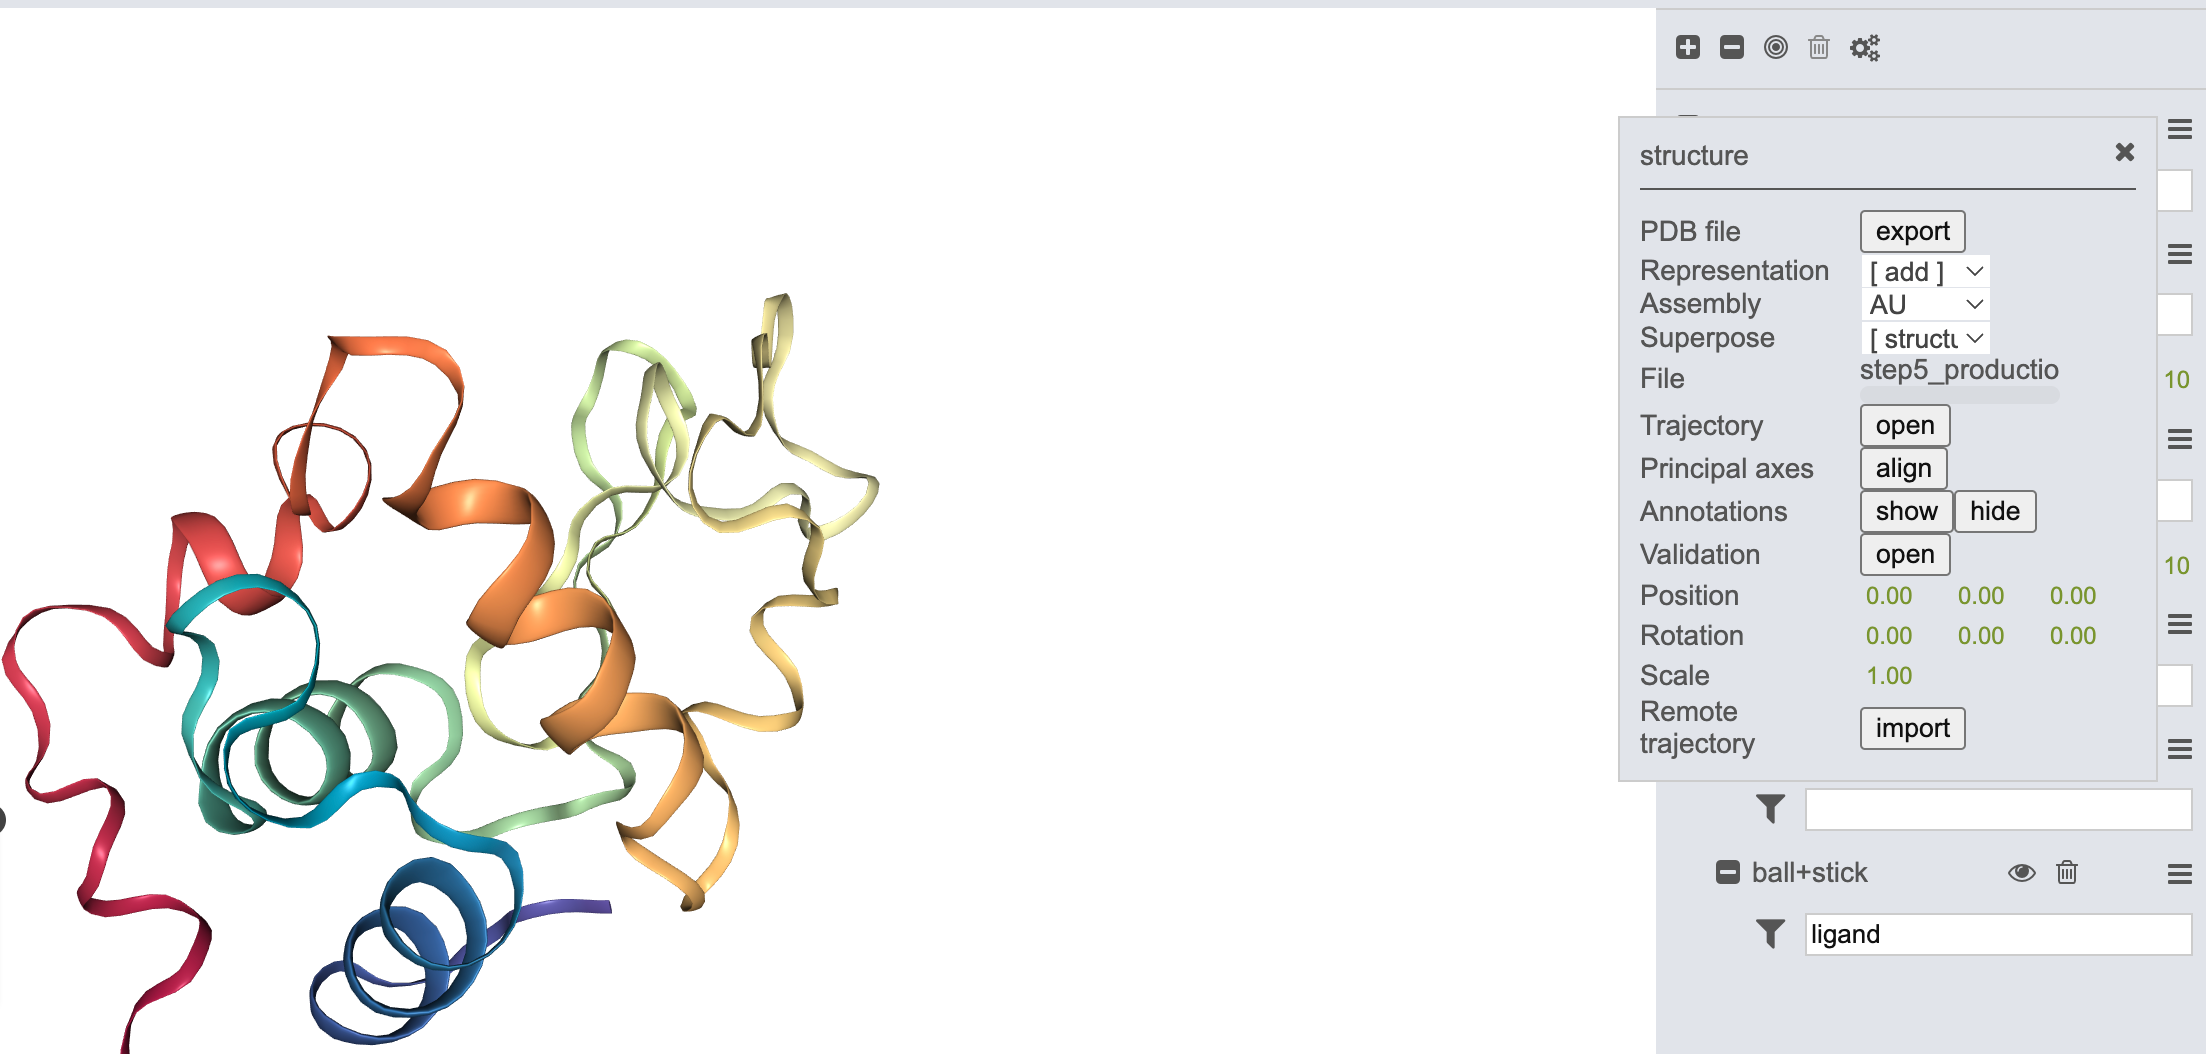

Ref: https://nglviewer.org/mdsrv/viewing.html

#Result Analysis

In [ ]:
!gmx trjconv -s step5_production.tpr -f step5_production.xtc -o step5_production_protPBC.xtc -pbc mol -center

                     :-) GROMACS - gmx trjconv, 2020.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
     

In [ ]:
!gmx rms -s step5_production.tpr -f step5_production_protPBC.xtc -o rmsd.xvg -tu ns

                       :-) GROMACS - gmx rms, 2020.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
       

In [ ]:
!gmx rms -s em.tpr -f step5_production_protPBC.xtc -o rmsd_xtal.xvg -tu ns

                       :-) GROMACS - gmx rms, 2020.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
       

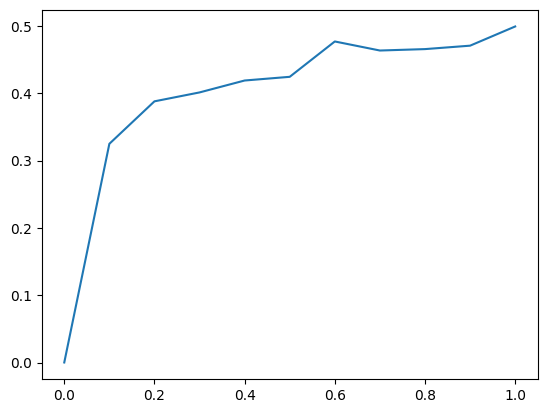

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
Time = np.array([0.0000000, 0.1000000, 0.2000000, 0.3000000, 0.4000000, 0.5000000, 0.6000000, 0.7000000, 0.8000000, 0.9000000, 1.0000000])
RMSD = np.array([0.0002139, 0.3248060, 0.3878517, 0.4010880, 0.4187779, 0.4242540, 0.4767250, 0.4632922, 0.4653982, 0.4704853, 0.4989826])

plt.plot(Time, RMSD)
plt.show()


In [ ]:
!gmx gyrate -s step5_production.tpr -f step5_production_protPBC.xtc -o gyrate.xvg

                      :-) GROMACS - gmx gyrate, 2020.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
     

<ipython-input-37-a5f54ea186fc>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


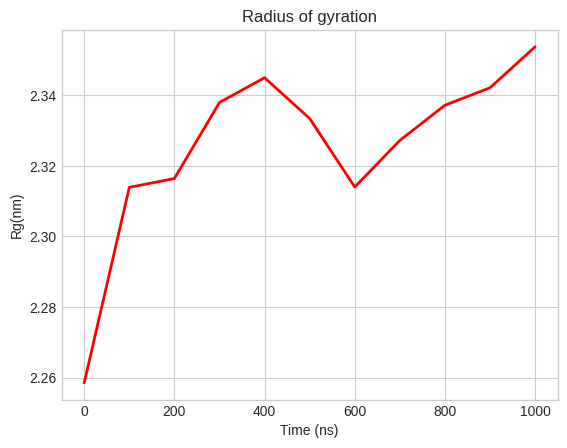

In [ ]:
#Plotting the temperature of the system
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

#Reading the text file containing this information
data = np.loadtxt('gyrate.xvg')

plt.title('Radius of gyration')
plt.xlabel('Time (ns)')
plt.ylabel('Rg(nm)')
plt.plot(data[:,0], data[:,1], linestyle='solid', linewidth='2', color='red')
plt.show()